Importando o banco de dados MNIST
-------

In [1]:
import numpy as np

In [2]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

CPU times: user 24.3 s, sys: 540 ms, total: 24.8 s
Wall time: 32.7 s


In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Pegando o vetor da característica de uma instância, remodelá-lo em uma array 28 x 28 e exibi-lo usando a função "imshow()"

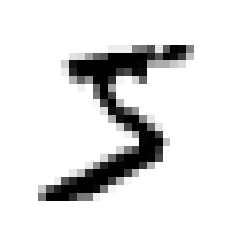

CPU times: user 61.3 ms, sys: 3.01 ms, total: 64.3 ms
Wall time: 78.3 ms


In [5]:
%%time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

Convertendo Y para inteiro.

In [7]:
y = y.astype(np.uint8)

In [8]:
#Criando um conjunto de teste e seprando antes de especionar os dados.

X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000], y[:60000]

Treinando um Classificador Binário.
---------------------------





In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Usando o Classificador SGDClassifier -Gradiente Descendente estocástico- da Scikit-Learn.


* O SGDClassifier depende da aleatoriedade durante o treinamento.
* Os parâmetros do random_state podem ser difinidos para ter resultados que possam ser reproduzidos.


In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

Cáculo de Desempenho.
---------------------



Calculando a acurácia com a validação cruzada:

.Implementando a Validação Cruzada

In [12]:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle=True, random_state = 150)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)

print(n_correct / len(y_pred))


0.10005


Avaliando o modelo SGDClassifier com a função cross_val_score() com o metodo do K-fold:



*   Aqui acurácia foi acima de 93%, informando que a proporção de predições é correta.






In [13]:

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

------------------------------------------
Um classificar que deixa a desejar (para fins didaticos).

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)    

Estimando a acurácia desse modelo:

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

uma demostração do por que geralmente a acurácia não é a medida de desempenho preferida para os classificadores, sobre tudo quando você estiver enfrentando um banco de dados assimêtricos.

-----------------------------

Matrix de Confusão
-----------

Pode-se realizar predições sobre o conjunto de testes, mas será feito em outro momento, enquanto isso será usado a função cross_val_predict(), assim: 


*   Realizando o método K-fold de validação cruzada com a função cross_val_predict(), ela retorna as predições feitas em cada teste de fold.

* Significa que você terá uma predição "limpa" (quando uma predição é feita por um modelo que nunca manipulou os dados durante o treinamento).



In [36]:
%%time
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)



CPU times: user 30.6 s, sys: 256 ms, total: 30.9 s
Wall time: 30.5 s


Agora, obtendo a matriz de confusão usando a função confusion_matrix() passando as classes-alvo y_train_5 e as classes previstas y_train_pred.

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* Na primeira linha desta matriz considera imagens não-5 (classe negativa): 53892 delas foram classificadas corretamente como não-5 (o famoso verdadeiros negativos), já as 687 restantes foram falsos positivos.

* Na segunda linha considera as imagens dos 5s (classe positiva): 1891 foram classificados como falso negativo, o restante dos 3530 foram classificados perfeitamente como verdadeiros positivos.

-Lembrando que um classificador perfeito teria somente verdadeiros positivos e verdadeiros negativos, no caso a sua matriz de confusão teria valores diferentes de zera apenas em sua diagonal principal, como segue no exemplo abaixo:

In [40]:
y_train_perfect_predition = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Precisão e Renovação 
--------

In [42]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 3530 / (3530+687)

0.8370879772350012

* 83,70%

In [47]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (3530+1891)

0.6511713705958311

* 65,11%

Acima mostra que o detector não parece tão bom como quando foi analisado anteriormente. 



*   Calculando o F1 score com a função f1_score:



In [49]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

* 73,25%

Trade-off precisão/revocação
------

chamando o metodo decision_function(), onde retorna um score para cada instância e, em seguida faz as predições com base nesses scores usando qualquer linha limiar desejad:

In [50]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [110]:
threshold = 0

In [111]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True, False, False, ...,  True, False, False])

Aumentando o limiar do SGDClassifier:

In [103]:
threshold = 8000

In [104]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, ...,  True, False, False])

Ao aumentar o limiar, diminui a revocação. o Classificador detecta quando o limiar é 0, mas o perde quando o limiar sobe até 8 mil.

* Agora sera usado a função cross_val_predict() para obter os scores de todas as instâncias no conjunto de treinamento.

In [112]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

* Calculando a precisão e a revocação de todos os limiares possiveis com a função precision_recall_curve:

In [113]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

* Plotando um grafico mostrando a precisão e a revocação:

Um detalhe, o codigo do livro estava errado, aqui em baixo segue a versão corrigida.

In [131]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

In [132]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]

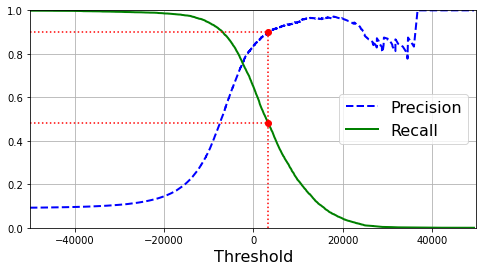

In [133]:
plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                                                                      
plt.show()

In [121]:
(y_train_pred == (y_scores > 0)).all()

True

* Plotando um grafico com a precisão diretamente em relação á revocação:

In [127]:
def plot_precision_recall(precision, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Revocação", fontsize=13)
  plt.ylabel("Precisão", fontsize=13)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)


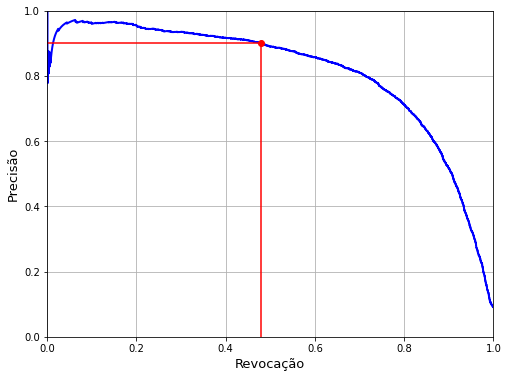

In [137]:
plt.figure(figsize=(8, 6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0.,0.9], "r")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()  

* Procurando o limiar mais baixo que forneça pelo menos 90% de precisão usando o
np.argmax().

In [138]:
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]

* Para fazer predições em vez de chamar o metodo predict(), estou usando esse códico abaixo:

In [140]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

* conferindo a precisão e a revocação dessas predições

att. isso mostra que tenho um classificador com 90%!

In [141]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [142]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

 *Curva* ROC
---

* Antes de plotar a curva ROC, irie usar a função roc_curve() a fim de calcular a TPR e o FPR para varios valores de limiares.

In [144]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

* Agora uma função para plota FPR em relação ao TPR usando o matplotlib (por enquanto rsrs)

In [157]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                
    plt.xlabel('Taxa de falsos positivos (Fall-Out)', fontsize=16)
    plt.ylabel('Taxa de Verdadeiro Positivo (Recall)', fontsize=16)
    plt.grid(True)     

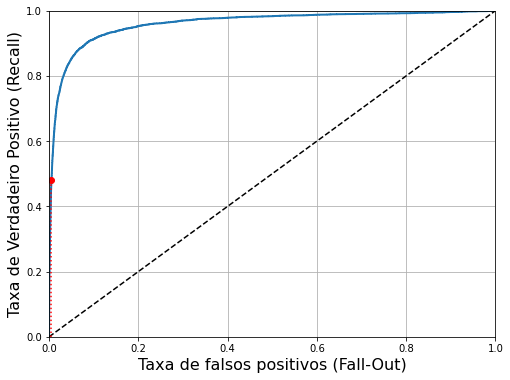

In [159]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                                                   
plt.show()

* Calculando o ROC AUC:

In [160]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

* Treinando um RandomForestClassifier e comparar o SGDClassifier.

In [161]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

* Usando a probabilidade da classe positiva como a score:

In [162]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

* Plotando a Curva ROC do RandomForestClassifier:

In [164]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

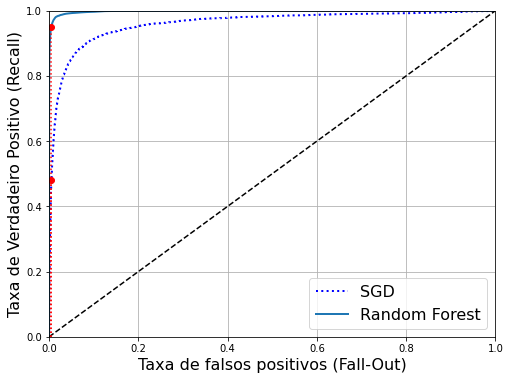

In [166]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

* A curva ROC do RandomForestClassifier se demonstrou melhor que a do SGDClassifier, ficando mais proximo de 1.

* Mostrando logo em seguida o valor do score:

In [168]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Classificação Multiclasse
----